<a href="https://colab.research.google.com/github/vadhri/ai-notebook/blob/main/timeseries/arima-basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Axes: >

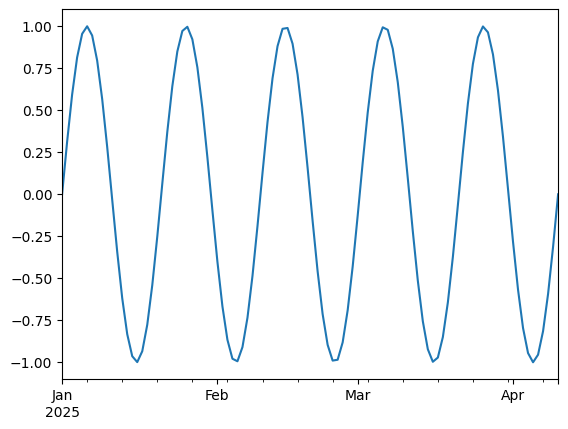

In [ ]:
import pandas as pd
import numpy as np

time_index = pd.date_range(start='2025-01-01', periods=100, freq='D')
x_values = np.linspace(0, 10 * np.pi, 100)
sine_values = np.sin(x_values)
time_series = pd.Series(sine_values, index=time_index)
time_series.plot()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stat

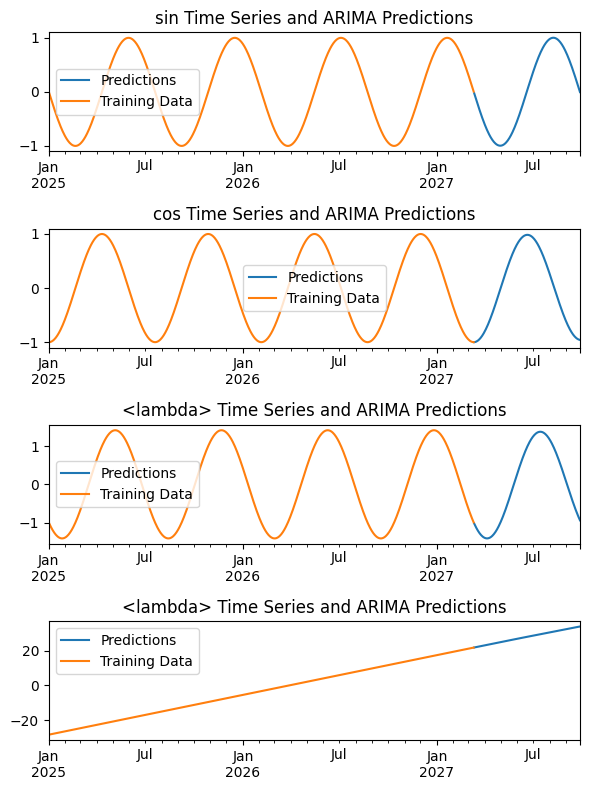

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Create 4 subplots for viewing trends
fig, ax = plt.subplots(4, 1, figsize=(6, 8)) # Adjusted figsize for better viewing

functions = [np.sin, np.cos, lambda x: np.sin(x) + np.cos(x), lambda x: 2*x+3]

for i, func in enumerate(functions):
  time_index = pd.date_range(start='2025-01-01', periods=1000, freq='D')
  x_values = np.linspace(-5*np.pi, 5 * np.pi, 1000)
  y_values = func(x_values)
  time_series = pd.Series(y_values, index=time_index)

  train_size = int(len(time_series) * 0.8)
  train_data, test_data = time_series[0:train_size], time_series[train_size:]

  try:
      model = ARIMA(train_data, order=(5,0,0))
      model_fit = model.fit()
      predictions = model_fit.predict(start=len(train_data), end=len(time_series)-1)
      predictions.plot(ax=ax[i], label='Predictions')
  except Exception as e:
      print(f"Could not fit ARIMA for {func.__name__}: {e}")
      predictions = pd.Series(np.nan, index=test_data.index)

  train_data.plot(ax=ax[i], label='Training Data')
  # test_data.plot(ax=ax[i], label='Test Data')


  ax[i].set_title(f'{func.__name__} Time Series and ARIMA Predictions')
  ax[i].legend()

plt.tight_layout()
plt.show()